<a href="https://colab.research.google.com/github/tusharkumarrohilla/mammographic_masses_ids_project/blob/main/mamm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pwd

'/content'

In [12]:
# !pip install numpy pandas sklearn seaborn

In [28]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import svm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns


In [29]:
input_file = 'mammographic_masses.data.txt'
masses_data = pd.read_csv(input_file,names =['BI-RADS','Age','Shape','Margin','Density','Severity'],usecols = ['Age','Shape','Margin','Density','Severity'],na_values='?')
masses_data.head(10)



,Age,Shape,Margin,Density,Severity
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,NaN,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,NaN,1
5,65.0,1.0,NaN,3.0,0
6,70.0,NaN,NaN,3.0,0
7,42.0,1.0,NaN,3.0,0
8,57.0,1.0,5.0,3.0,1
9,60.0,NaN,5.0,1.0,1


In [5]:
masses_data.describe()

,Age,Shape,Margin,Density,Severity
count,956.000000,930.000000,913.000000,885.000000,961.000000
mean,55.487448,2.721505,2.796276,2.910734,0.463059
std,14.480131,1.242792,1.566546,0.380444,0.498893
min,18.000000,1.000000,1.000000,1.000000,0.000000
25%,45.000000,2.000000,1.000000,3.000000,0.000000
50%,57.000000,3.000000,3.000000,3.000000,0.000000
75%,66.000000,4.000000,4.000000,3.000000,1.000000
max,96.000000,4.000000,5.000000,4.000000,1.000000


In [6]:
most_occ = pd.get_dummies(masses_data['Shape']).sum().sort_values(ascending=False).index[0]
# The above snippet makes a descending sorted array of the Embarked column and gets the first value

def replace_nan(x):
#Function to get the most occured element in case of null else returns the passed value
    if pd.isnull(x):
        return most_occ
    else:
        return x

#Mapping the dataset according to replace_nan() function
masses_data['Shape'] = masses_data['Shape'].map(replace_nan)


In [30]:
masses_data = masses_data.dropna()
masses_data.describe()

,Age,Shape,Margin,Density,Severity
count,831.000000,831.000000,831.000000,831.000000,831.000000
mean,55.777377,2.783394,2.814681,2.915764,0.484958
std,14.663528,1.242331,1.566771,0.350737,0.500075
min,18.000000,1.000000,1.000000,1.000000,0.000000
25%,46.000000,2.000000,1.000000,3.000000,0.000000
50%,57.000000,3.000000,3.000000,3.000000,0.000000
75%,66.000000,4.000000,4.000000,3.000000,1.000000
max,96.000000,4.000000,5.000000,4.000000,1.000000


In [31]:
# 11.7 persent data is drop  
features = list(masses_data.columns[:4])
X = masses_data[features].values

labels = list(masses_data.columns[4:])
y = masses_data[labels].values
y = y.ravel()

scaler  = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

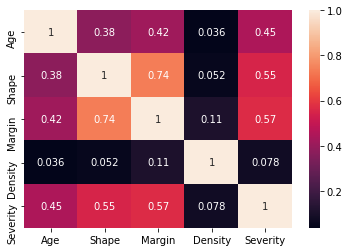

In [9]:
sns.heatmap(masses_data.corr(),annot=True)

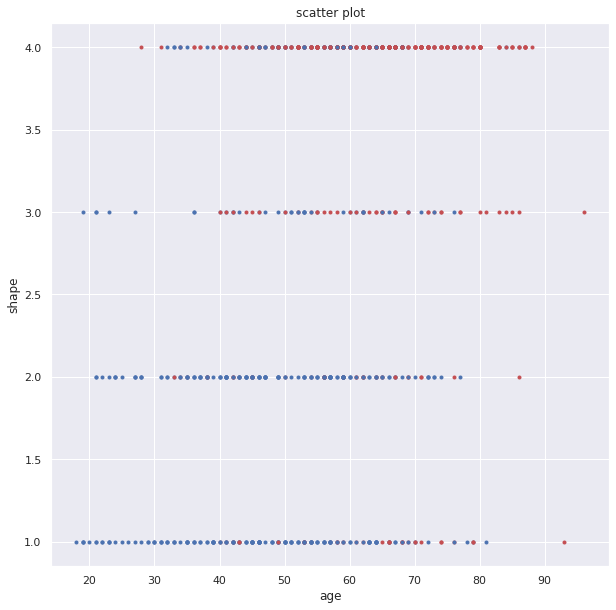

In [32]:
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

for idx, row in masses_data.iterrows():
    ax.scatter(row[0], row[1], color = 'r' if row[4]==1 else 'b', marker='.')

ax.set_xlabel('age')
ax.set_ylabel('shape')
ax.set_title('scatter plot')
plt.show()

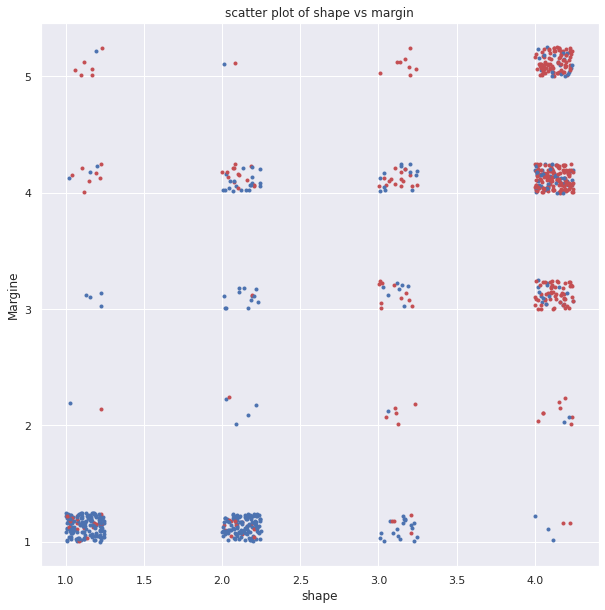

In [33]:
import random
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

for idx, row in masses_data.iterrows():
    ax.scatter(row[1]+(random.random()*0.25),row[2]+(random.random()*0.25), color = 'r' if row[4]==1 else 'b', marker='.')
# we scatter the points plotted to visualize the values that get stacked in ( x+(0,0.25) , y+(0,0.25) ) range 

ax.set_xlabel('shape')
ax.set_ylabel('Margine')
ax.set_title('scatter plot of shape vs margin')
plt.show()

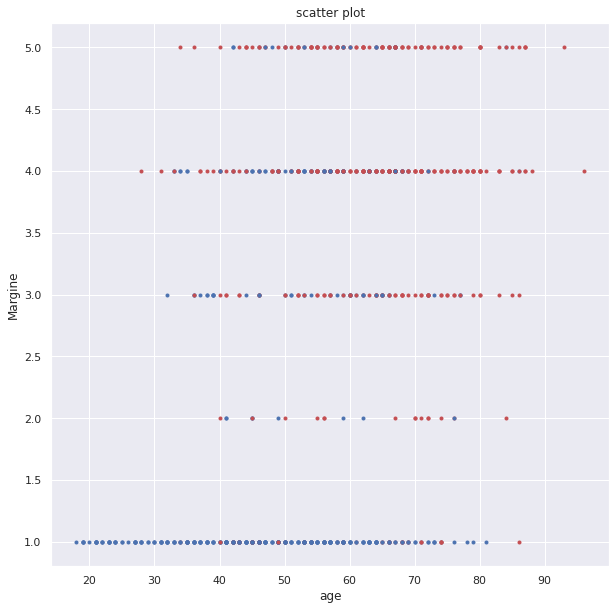

In [34]:
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

for idx, row in masses_data.iterrows():
    ax.scatter(row[0], row[2], color = 'r' if row[4]==1 else 'b', marker='.')

ax.set_xlabel('age')
ax.set_ylabel('Margine')
ax.set_title('scatter plot')
plt.show()

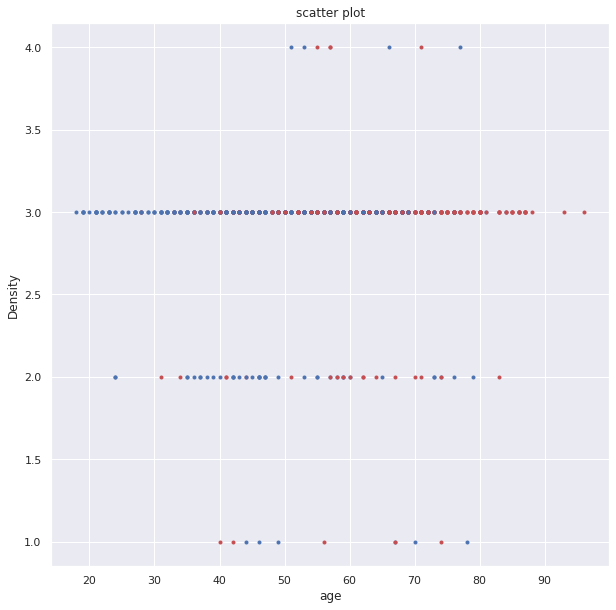

In [35]:
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

for idx, row in masses_data.iterrows():
    ax.scatter(row[0], row[3], color = 'r' if row[4]==1 else 'b', marker='.')

ax.set_xlabel('age')
ax.set_ylabel('Density')
ax.set_title('scatter plot')
plt.show()

In [36]:
clf = linear_model.LogisticRegression(C=1e5)
scores_lr = model_selection.cross_val_score(clf,X,y,cv=5)
print(scores_lr)
score_mean_lr=scores_lr.mean();
print("score of LogisticRegression classifier :",scores_lr.mean())

[0.75449102 0.8313253  0.77710843 0.80722892 0.8313253 ]
score of LogisticRegression classifier : 0.8002957939542601


[[85 21]
 [ 9 93]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       106
           1       0.82      0.91      0.86       102

    accuracy                           0.86       208
   macro avg       0.86      0.86      0.86       208
weighted avg       0.86      0.86      0.86       208



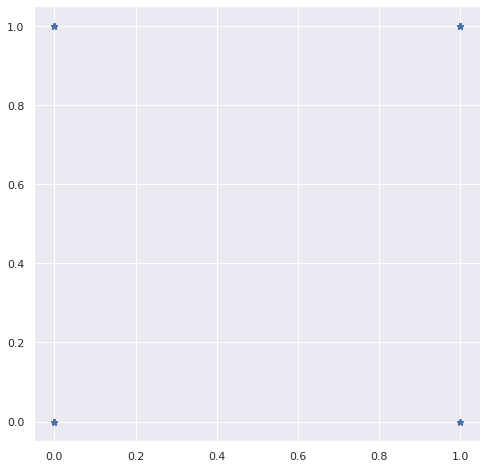

In [37]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel.fit(X_train,y_train)
y_pred = LogisticRegressionModel.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
plt.scatter(y_test, y_pred, marker='*')

In [38]:
svm = svm.SVC(kernel='linear', C=1)
scores_svm = model_selection.cross_val_score(svm,X,y,cv=5)
print(scores_svm)
score_mean_svm=scores_svm.mean();
print("score of svm classifier :",scores_svm.mean())

[0.74251497 0.8373494  0.77710843 0.80722892 0.80722892]
score of svm classifier : 0.7942861265420966


[[85 21]
 [25 77]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       106
           1       0.79      0.75      0.77       102

    accuracy                           0.78       208
   macro avg       0.78      0.78      0.78       208
weighted avg       0.78      0.78      0.78       208



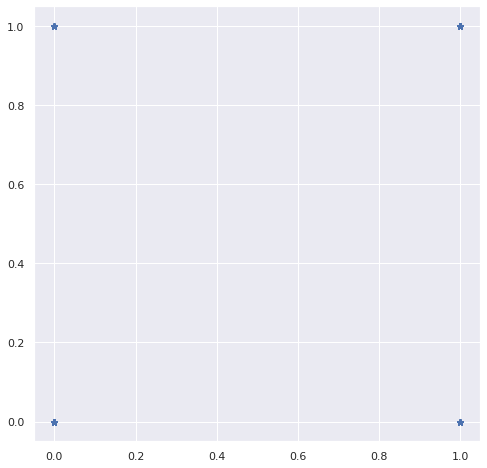

In [39]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeModel = DecisionTreeClassifier()
DecisionTreeModel.fit(X_train,y_train)
y_pred = DecisionTreeModel.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
plt.scatter(y_test, y_pred, marker='*')


In [40]:
score_mean_decisiontree= DecisionTreeModel.score(X_test,y_test)
print("Score of Decision Tree Classifier: ", DecisionTreeModel.score (X_test,y_test))

Score of Decision Tree Classifier:  0.7788461538461539


In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)
scores_knn = model_selection.cross_val_score(knn,X,y,cv=5)
print(scores_knn)
score_mean_knn=scores_knn.mean();
print("score of knn classifier :",scores_knn.mean())

[0.74251497 0.79518072 0.79518072 0.8253012  0.80722892]
score of knn classifier : 0.7930813072649882


In [42]:

y_pred = KNeighborsClassifierModel.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[83 23]
 [10 92]]


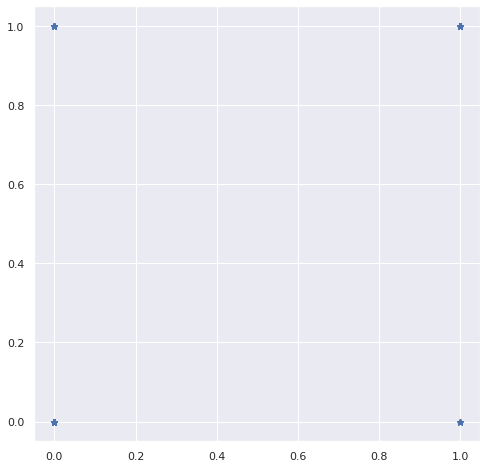

In [43]:
plt.scatter(y_test, y_pred, marker='*')

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
score_rf = model_selection.cross_val_score(rf,X,y,cv=5)
print(score_rf)
score_mean_rf=score_rf.mean();
print("score of LogisticRegression classifier :",score_rf.mean())

[0.73053892 0.76506024 0.75301205 0.77710843 0.73493976]
score of LogisticRegression classifier : 0.7521318808166798


In [46]:
scores = [score_mean_lr,score_mean_knn,score_mean_svm,score_mean_decisiontree,score_mean_rf]
algorithms = ["Logistic Regression","K-Nearest Neighbors","svm","decisiontree","randomforest"]

for i in range(len(algorithms)):
    scores[i]=scores[i]*100
  # we substract 0.7 to visualize the data better due to very small dif
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")
    scores[i]=scores[i]-70

The accuracy score achieved using Logistic Regression is: 80.02957939542601 %
The accuracy score achieved using K-Nearest Neighbors is: 79.30813072649882 %
The accuracy score achieved using svm is: 79.42861265420966 %
The accuracy score achieved using decisiontree is: 77.88461538461539 %
The accuracy score achieved using randomforest is: 75.21318808166798 %


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


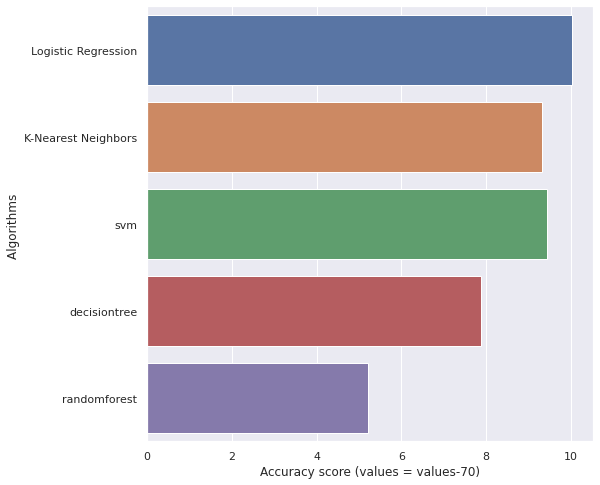

In [48]:
sns.set(rc={'figure.figsize':(8,8)})
plt.ylabel("Algorithms ")
plt.xlabel("Accuracy score (values = values-70)")
sns.barplot(scores,algorithms)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')